In [3]:
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Mean Square Error (MSE/ L2 Loss)

In [6]:
def getMSE(target, predicted):
    """
    target: Array of target values
    predicted: Array of predicted values
    
    returns: Mean Square Error Loss
    """

    return (target - predicted) ** 2

Total MSE Loss: 3333343534.0


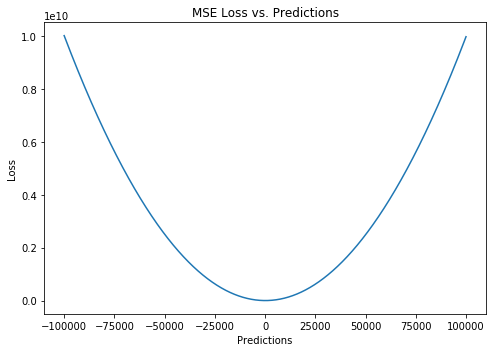

In [7]:
fig, ax1 = plt.subplots(1,1, figsize = (7,5))

# array of same target value 10000 times
target = np.repeat(100, 100000)

# array of predicted value from -100000 to 99995
predicted = np.arange(-100000,100000, 2)

mse_loss = getMSE(target, predicted)

total_mse_loss = np.mean(mse_loss)
print("Total MSE Loss: {}".format(total_mse_loss))

# plot 
ax1.plot(predicted, mse_loss)
ax1.set_xlabel("Predictions")
ax1.set_ylabel("Loss")
ax1.set_title("MSE Loss vs. Predictions")

fig.tight_layout()

# Mean Absolute Error (MAE/ L1 loss)

In [8]:
def getMAE(target, predicted):
    """
    target: Array of target values
    predicted: Array of predicted values
    
    returns: Mean Absolute Error Loss
    """
    
    return np.abs(target - predicted)

Total MAE Loss: 50000.051


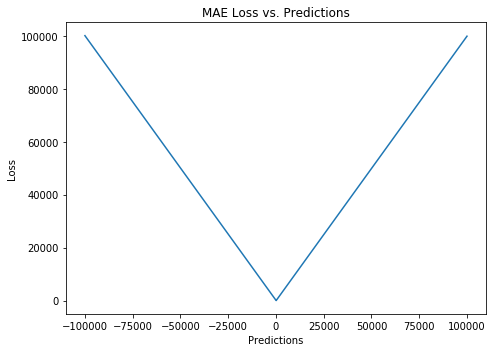

In [9]:
fig, ax1 = plt.subplots(1,1, figsize = (7,5))

# array of same target value 10000 times
target = np.repeat(100, 100000)

# array of predicted value from -100000 to 99995
predicted = np.arange(-100000,100000, 2)

mae_loss = getMAE(target, predicted)

total_mae_loss = np.mean(mae_loss)
print("Total MAE Loss: {}".format(total_mae_loss))

# plot 
ax1.plot(predicted, mae_loss)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Loss')
ax1.set_title("MAE Loss vs. Predictions")

fig.tight_layout()

# Huber Loss

In [21]:
def getHuberLoss(target, predicted, delta):
    """
    target: Array of target values
    predicted: Array of predicted values
    delta: Hyperparameter i.e. MAE when 𝛿 ~ 0 and MSE when 𝛿 ~ ∞
    
    returns: Huber loss / smooth mean absolute error loss
    """
    
    return np.where(np.abs(target - predicted) < delta , 
                    0.5 * ((target - predicted) ** 2),
                    delta * np.abs(target - predicted) - 0.5 * (delta ** 2))

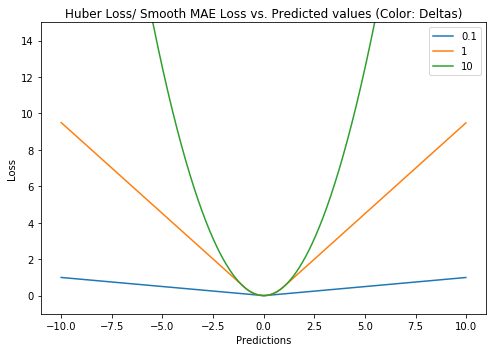

In [26]:
fig, ax1 = plt.subplots(1,1, figsize = (7,5))

# array of same target value 10000 times
target = np.repeat(0, 1000)

# array of predicted value from -100000 to 99995
predicted = np.arange(-10,10, 0.02)

delta = [0.1, 1, 10]

sm_mae_loss = [getHuberLoss(target, predicted, delta[x]) for x in range(len(delta))]

# plot 
for x in range(len(delta)):
    ax1.plot(predicted, sm_mae_loss[x], label = delta[x])
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Loss')
ax1.set_title("Huber Loss/ Smooth MAE Loss vs. Predicted values (Color: Deltas)")
ax1.legend()
ax1.set_ylim(bottom=-1, top = 15)

fig.tight_layout()

# Log cosh loss

In [27]:
def getLogCosh(target, predicted):
    """
    target: Array of target values
    predicted: Array of predicted values
    
    returns: Log Cosh Loss
    """
    
    return np.log(np.cosh(predicted - target))

Total Log-Cosh Loss: 4.347979504341417


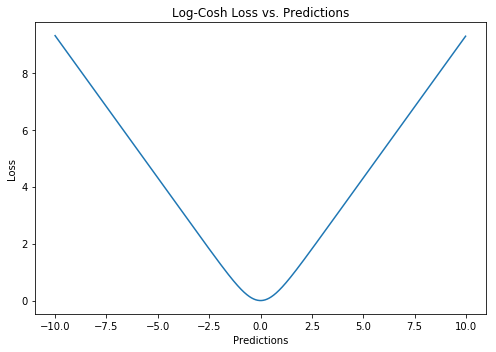

In [29]:
fig, ax1 = plt.subplots(1,1, figsize = (7,5))

# array of same target value 10000 times
target = np.repeat(0, 1000) 
# array of predicted value from -100000 to 99995
predicted = np.arange(-10,10, 0.02)

logcosh_loss = getLogCosh(target, predicted)
total_logcosh_loss = np.mean(logcosh_loss)
print("Total Log-Cosh Loss: {}".format(total_logcosh_loss))

# plot 
ax1.plot(predicted, logcosh_loss)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Loss')
ax1.set_title("Log-Cosh Loss vs. Predictions")

fig.tight_layout()

# Quantile loss

In [31]:
def getQuantile(target, predicted, theta):
    """
    target: Array of target values
    predicted: Array of predicted values
    theta: Hyperparameter i.e. lesser value gives more penalty to overestimation, [0, 1]
    
    returns: Quantile loss
    """
    return np.where(target >= predicted,
                    theta * (np.abs(target - predicted)),
                    (1-theta) * (np.abs(target - predicted)))

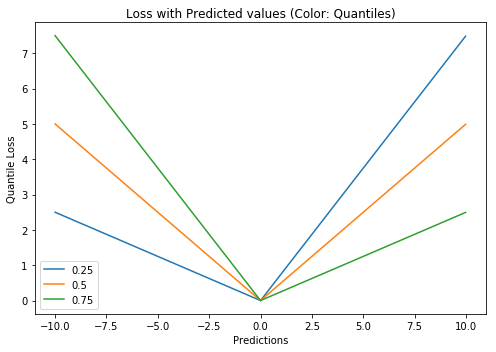

In [32]:
fig, ax1 = plt.subplots(1,1, figsize = (7,5))

# array of same target value 10000 times
target = np.repeat(0, 1000) 
# array of predicted value from -100000 to 99995
predicted = np.arange(-10,10, 0.02)

quantiles = [0.25, 0.5, 0.75]

quan_loss = [getQuantile(target, predicted, q) for q in quantiles]

# plot 
for i in range(len(quantiles)):
    ax1.plot(predicted, quan_loss[i], label = quantiles[i])
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Quantile Loss')
ax1.set_title("Loss with Predicted values (Color: Quantiles)")
ax1.legend()

fig.tight_layout()